In [193]:
import numpy as np
import pandas as pd
from keras import Input, Model, layers
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import math
from scipy import stats
from tensorflow import keras
from keras import Input, Model, layers
from scipy.linalg import eigh, cholesky
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler

In [187]:
dataset = pd.read_csv("clean_data.csv")
X = dataset.to_numpy()
X = X[:,0:3]

# Dataset Generation

Correlated Gaussian noise

In [145]:
method = 'cholesky'

num_samples = 1000

# Covariance matrix
r = np.array([
        [1000000, 20000, 500],
        [20000,    2500, 20],
        [500,       20,    1]
    ])

# Mean vector
m = np.array([
    [5000], # Distance travelled in metres/day
    [100], # Time spent on wheelchair in minutes/day
    [2.5] # Average distance from home in km/day
])

# Generate samples from three independent normally distributed random variables (with mean 0 and std. dev. 1)
x = norm.rvs(size=(3, num_samples))

# Compute the Cholesky decomposition
c = cholesky(r, lower=True)

# Convert the data to correlated random variables. 
y = np.dot(c, x) + m
y = np.absolute(y) # to avoid negative values

Text(0, 0.5, 'Distance travelled on wheelchair (metres/day)')

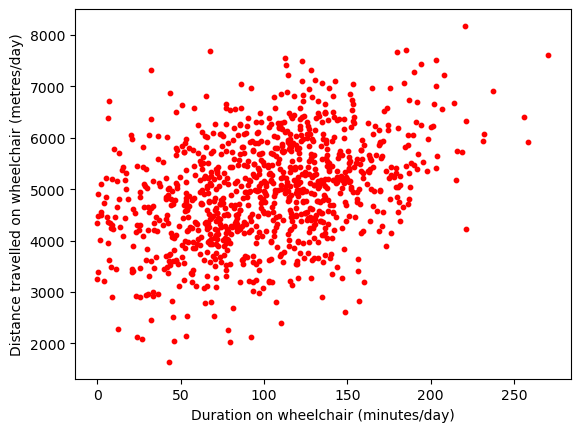

In [158]:
plt.scatter(y[1,:],y[0,:], s=10, c='r')
plt.xlabel("Duration on wheelchair (minutes/day)")
plt.ylabel("Distance travelled on wheelchair (metres/day)")

In [162]:
dataset = y.transpose()

In [166]:
pd.DataFrame(dataset).to_csv("Correlated_simulated_data.csv")

In [205]:
dataset = pd.read_csv("Correlated_simulated_data.csv")
X_corr = dataset.to_numpy()
X_corr = X_corr[:, 1:4]
scaler = MinMaxScaler()
scaler.fit(X_corr)
X_corr = scaler.transform(X_corr)

# PCA

In [209]:
pca = PCA(n_components=1)
pca.fit(X_corr)

Y = pca.transform(X_corr)

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

Y = sigmoid(Y)*100

In [210]:
print(Y)

[[54.29505111]
 [54.96537314]
 [54.65655407]
 [36.80765463]
 [49.37025772]
 [44.88583629]
 [39.85249006]
 [38.08295668]
 [57.16078639]
 [49.66957665]
 [52.58586675]
 [46.29419921]
 [40.41020711]
 [52.73800057]
 [49.67671877]
 [53.94455901]
 [61.88844615]
 [50.14451267]
 [48.26051823]
 [50.49377369]
 [48.88343887]
 [40.73659336]
 [53.32387462]
 [49.97583475]
 [54.64894164]
 [50.29114819]
 [59.31818381]
 [53.60436937]
 [46.03032393]
 [57.50264246]
 [55.32238116]
 [46.75491737]
 [49.53161159]
 [59.71505477]
 [48.17629023]
 [54.11340746]
 [60.34234235]
 [47.34342793]
 [56.40319565]
 [51.44363456]
 [42.00420756]
 [52.03285474]
 [54.75259167]
 [46.55035529]
 [52.28201632]
 [42.96682417]
 [57.25054703]
 [44.63327796]
 [41.48660724]
 [42.93334499]
 [51.37512982]
 [50.16938158]
 [52.57105045]
 [39.39842922]
 [47.02596424]
 [55.97990834]
 [71.47048252]
 [51.64189103]
 [45.9453791 ]
 [50.81764521]
 [50.55520154]
 [41.88705136]
 [50.3683451 ]
 [47.64806034]
 [53.56250321]
 [57.13735916]
 [46.69607

In [211]:
stats.describe(Y)

DescribeResult(nobs=1000, minmax=(array([35.02635078]), array([71.47048252])), mean=array([49.99773077]), variance=array([33.54053933]), skewness=array([0.07841584]), kurtosis=array([-0.10257043]))

<function matplotlib.pyplot.show(close=None, block=None)>

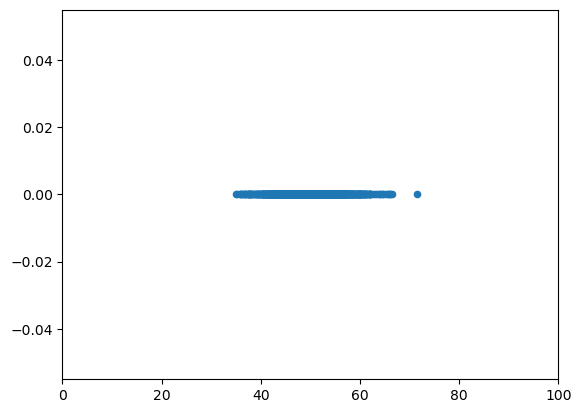

In [212]:
plt.scatter(Y, np.zeros(Y.shape[0]), s=20)
plt.xlim(0, 100)
plt.show

# Autoencoder

In [213]:
input_dim = 3
latent_dim = 1

input_layer = Input(shape=(input_dim,))
encoded = layers.Dense(2, activation='relu')(input_layer)
encoded = layers.Dense(latent_dim, activation='sigmoid')(encoded)

decoded = layers.Dense(2, activation='relu')(encoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(X_corr, X_corr,
                epochs=500,
                batch_size=None,
                shuffle=True,
                )

encoder = Model(input_layer, encoded)

Epoch 1/500
32/32 [==============================] - 1s 2ms/step - loss: 0.7059
Epoch 2/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6988
Epoch 3/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6942
Epoch 4/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6910
Epoch 5/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6888
Epoch 6/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6872
Epoch 7/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6861
Epoch 8/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6852
Epoch 9/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6846
Epoch 10/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6840
Epoch 11/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6835
Epoch 12/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6831
Epoch 13/500
32/32 [=================

32/32 [==============================] - 0s 2ms/step - loss: 0.6472
Epoch 103/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6470
Epoch 104/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6468
Epoch 105/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6466
Epoch 106/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6464
Epoch 107/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6462
Epoch 108/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6460
Epoch 109/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6459
Epoch 110/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6457
Epoch 111/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6456
Epoch 112/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6454
Epoch 113/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6453
Epoch 114/500
32/32 [=========

32/32 [==============================] - 0s 3ms/step - loss: 0.6423
Epoch 203/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6423
Epoch 204/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6423
Epoch 205/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6423
Epoch 206/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6423
Epoch 207/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6423
Epoch 208/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6423
Epoch 209/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6423
Epoch 210/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6422
Epoch 211/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6422
Epoch 212/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6422
Epoch 213/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6422
Epoch 214/500
32/32 [=========

32/32 [==============================] - 0s 3ms/step - loss: 0.6419
Epoch 303/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6419
Epoch 304/500
32/32 [==============================] - 0s 4ms/step - loss: 0.6419
Epoch 305/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6419
Epoch 306/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6419
Epoch 307/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6419
Epoch 308/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6419
Epoch 309/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6419
Epoch 310/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6419
Epoch 311/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6419
Epoch 312/500
32/32 [==============================] - 0s 4ms/step - loss: 0.6419
Epoch 313/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6419
Epoch 314/500
32/32 [=========

32/32 [==============================] - 0s 3ms/step - loss: 0.6418
Epoch 403/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6418
Epoch 404/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6418
Epoch 405/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6418
Epoch 406/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6418
Epoch 407/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6418
Epoch 408/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6418
Epoch 409/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6418
Epoch 410/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6418
Epoch 411/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6418
Epoch 412/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6418
Epoch 413/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6418
Epoch 414/500
32/32 [=========

In [216]:
encoder.save(r"C:\Users\ahmed\Desktop\Year 3\Projects\GM1\Code\3GM1_team_3\Machine_Learning")

INFO:tensorflow:Assets written to: C:\Users\ahmed\Desktop\Year 3\Projects\GM1\Code\3GM1_team_3\Machine_Learning\assets


In [217]:
encoder = keras.models.load_model(r'C:\users\ahmed\Desktop\Year 3\Projects\GM1\Code\3GM1_team_3\Machine_Learning')

In [218]:
Z = encoder.predict(X_corr)*100

32/32 [==============================] - 0s 1ms/step


In [219]:
print(Z)

[[31.547651]
 [30.755217]
 [31.74467 ]
 [68.57985 ]
 [42.064205]
 [51.512604]
 [61.68136 ]
 [65.815025]
 [27.211046]
 [41.261997]
 [34.924576]
 [47.843807]
 [60.659176]
 [34.816273]
 [41.198536]
 [33.030926]
 [19.610914]
 [40.061817]
 [44.092846]
 [39.26509 ]
 [42.90271 ]
 [60.25523 ]
 [33.229343]
 [40.950302]
 [31.249285]
 [40.241386]
 [23.485569]
 [33.495476]
 [49.41177 ]
 [26.566872]
 [30.075628]
 [47.231586]
 [41.04346 ]
 [22.614365]
 [44.806973]
 [32.407696]
 [21.582626]
 [45.875175]
 [28.387455]
 [37.729416]
 [57.091034]
 [36.138092]
 [30.871788]
 [47.720955]
 [35.939087]
 [55.33172 ]
 [26.944382]
 [52.318466]
 [58.620857]
 [55.483334]
 [37.966396]
 [40.106625]
 [35.368214]
 [62.86491 ]
 [46.832146]
 [29.04077 ]
 [ 8.700952]
 [37.099888]
 [48.854176]
 [38.63229 ]
 [39.5725  ]
 [57.68901 ]
 [39.719044]
 [45.926918]
 [33.261883]
 [26.434862]
 [47.355755]
 [56.31591 ]
 [58.144295]
 [49.92276 ]
 [35.659126]
 [34.749134]
 [32.56096 ]
 [48.978786]
 [54.499317]
 [50.08083 ]
 [20.749538]

In [220]:
stats.describe(Z)

DescribeResult(nobs=1000, minmax=(array([8.700952], dtype=float32), array([71.55788], dtype=float32)), mean=array([40.99308], dtype=float32), variance=array([130.675], dtype=float32), skewness=array([0.16576102], dtype=float32), kurtosis=array([-0.38189697], dtype=float32))

<function matplotlib.pyplot.show(close=None, block=None)>

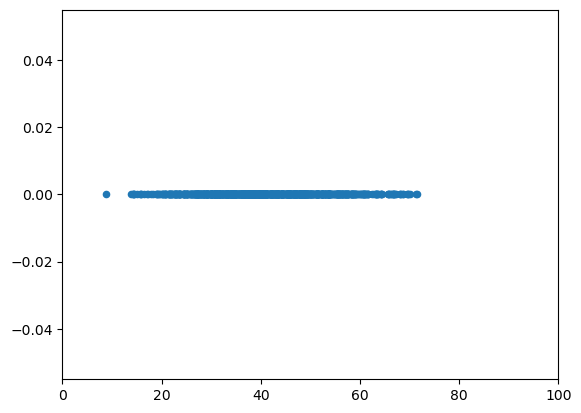

In [221]:
plt.scatter(Z, np.zeros(Y.shape[0]), s=20)
plt.xlim(0, 100)
plt.show

# Comparison

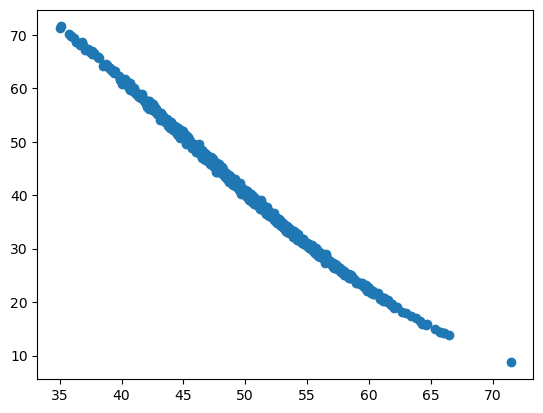

In [222]:
plt.scatter(Y,Z)

<function matplotlib.pyplot.show(close=None, block=None)>

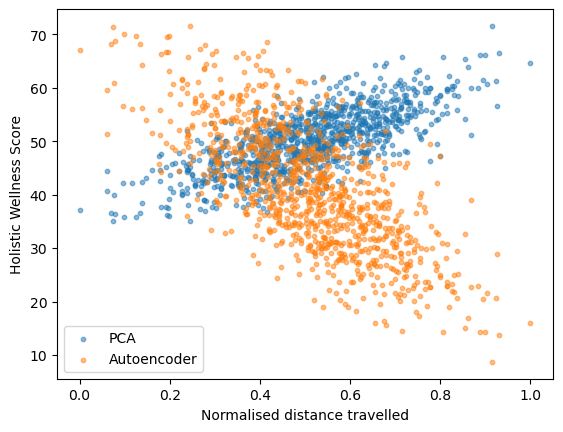

In [228]:
# Plotting the wellness scores against distance travelled (normalised)

i = 0

plt.scatter(X_corr[:,i],Y, label = "PCA", alpha=0.5, s=10)
plt.scatter(X_corr[:,i],Z, label = "Autoencoder", alpha=0.5, s=10)
plt.legend()
plt.xlabel("Normalised distance travelled")
plt.ylabel("Holistic Wellness Score")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

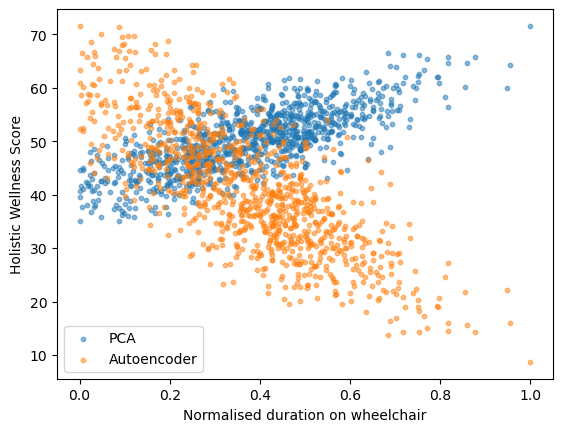

In [237]:
# Plotting the wellness scores against duration (normalised)

i = 1

plt.scatter(X_corr[:,i],Y, label = "PCA", alpha=0.5, s=10)
plt.scatter(X_corr[:,i],Z, label = "Autoencoder", alpha=0.5, s=10)
plt.legend()
plt.xlabel("Normalised duration on wheelchair")
plt.ylabel("Holistic Wellness Score")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

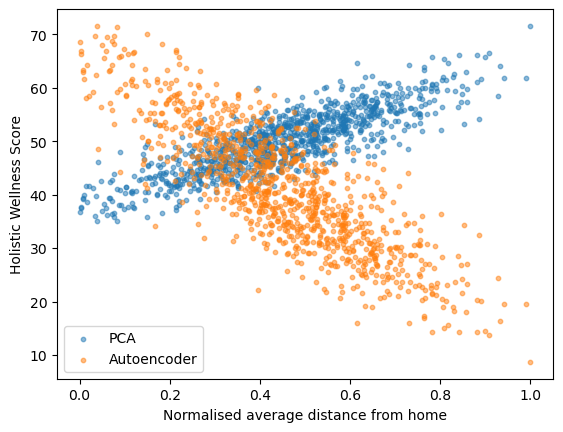

In [230]:
# Plotting the wellness scores against distance from home (normalised)

i = 2

plt.scatter(X_corr[:,i],Y, label = "PCA", alpha=0.5, s=10)
plt.scatter(X_corr[:,i],Z, label = "Autoencoder", alpha=0.5, s=10)
plt.legend()
plt.xlabel("Normalised average distance from home")
plt.ylabel("Holistic Wellness Score")
plt.show

Autoencoder appears to be returning an "anti-wellness" score, which can be easily corrected

In [249]:
Z_corrected = 100 - Z

In [250]:
stats.describe(Z_corrected)

DescribeResult(nobs=1000, minmax=(array([28.442123], dtype=float32), array([91.29905], dtype=float32)), mean=array([59.006924], dtype=float32), variance=array([130.675], dtype=float32), skewness=array([-0.16576207], dtype=float32), kurtosis=array([-0.38189673], dtype=float32))

<function matplotlib.pyplot.show(close=None, block=None)>

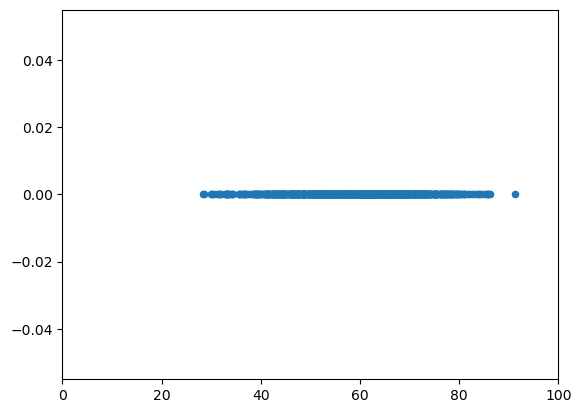

In [251]:
plt.scatter(Z_corrected, np.zeros(Y.shape[0]), s=20)
plt.xlim(0, 100)
plt.show

Final comparison

<function matplotlib.pyplot.show(close=None, block=None)>

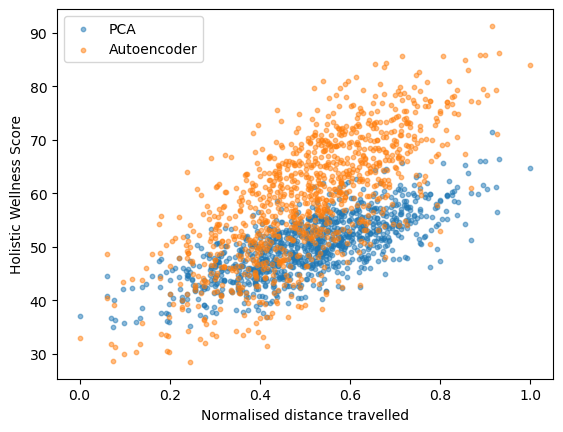

In [257]:
# Plotting the wellness scores against distance travelled (normalised)

i = 0

plt.scatter(X_corr[:,i],Y, label = "PCA", alpha=0.5, s=10)
plt.scatter(X_corr[:,i],Z_corrected, label = "Autoencoder", alpha=0.5, s=10)
plt.legend()
plt.xlabel("Normalised distance travelled")
plt.ylabel("Holistic Wellness Score")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

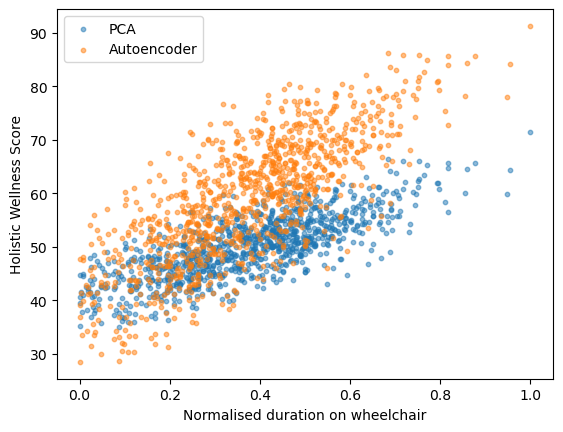

In [258]:
# Plotting the wellness scores against duration (normalised)

i = 1

plt.scatter(X_corr[:,i],Y, label = "PCA", alpha=0.5, s=10)
plt.scatter(X_corr[:,i],Z_corrected, label = "Autoencoder", alpha=0.5, s=10)
plt.legend()
plt.xlabel("Normalised duration on wheelchair")
plt.ylabel("Holistic Wellness Score")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

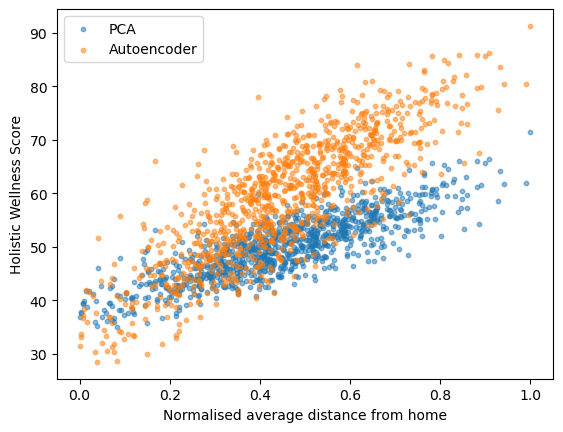

In [259]:
# Plotting the wellness scores against distance from home (normalised)

i = 2

plt.scatter(X_corr[:,i],Y, label = "PCA", alpha=0.5, s=10)
plt.scatter(X_corr[:,i],Z_corrected, label = "Autoencoder", alpha=0.5, s=10)
plt.legend()
plt.xlabel("Normalised average distance from home")
plt.ylabel("Holistic Wellness Score")
plt.show